In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("classic")
import keras
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler



ModuleNotFoundError: No module named 'numpy'

In [ ]:
df =pd.read_csv('GOOG.csv')

In [ ]:
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [ ]:
df=df.drop(columns=['symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'])
df

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733


In [ ]:
df = df.sort_values(by='date')
df

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733


In [ ]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df

,date,close,high,low,open,volume
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733


In [ ]:
df = df.set_index('date')
df

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


Visualization of Opening and Closing Price


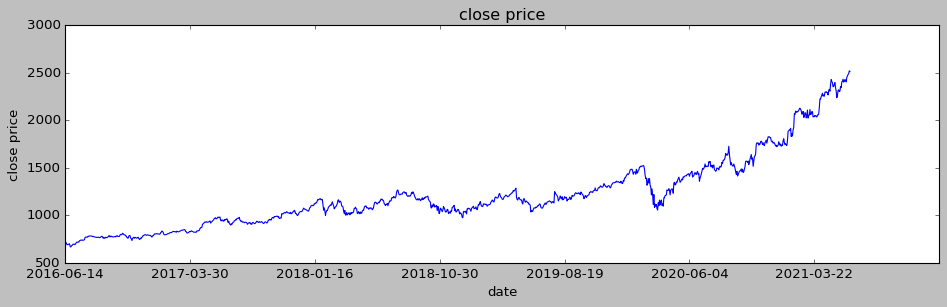

In [ ]:
plt.figure(figsize=(12, 4))
df['close'].plot()
plt.ylabel('close price')
plt.xlabel('date')
plt.title("close price")
plt.tight_layout()
plt.show()


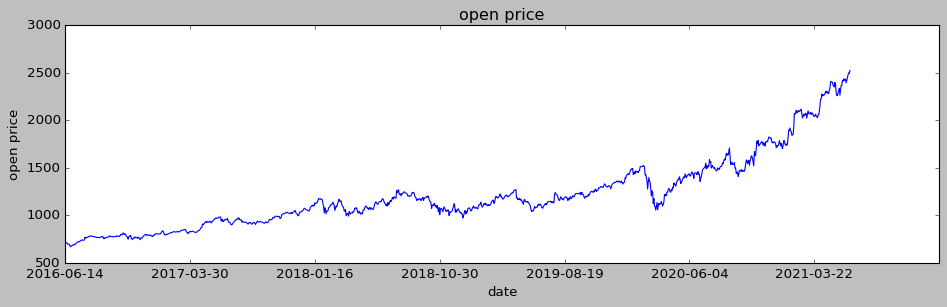

In [ ]:
plt.figure(figsize=(12, 4))
df['open'].plot()
plt.ylabel('open price')
plt.xlabel('date')
plt.title("open price")
plt.tight_layout()
plt.show()


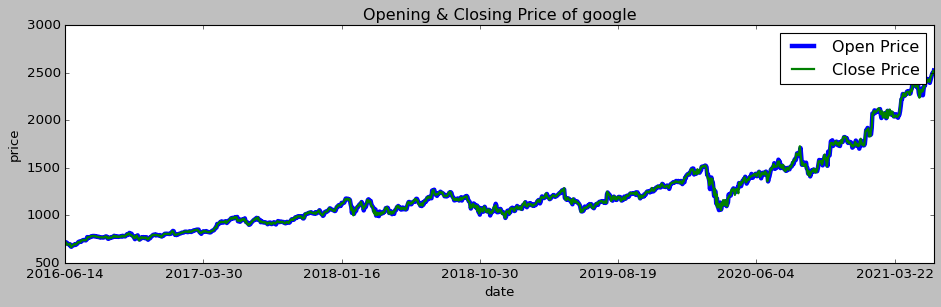

In [ ]:
plt.figure(figsize=(12, 4))
df['open'].plot(linewidth = 4)
df['close'].plot(linewidth=2)
plt.ylabel('price')
plt.xlabel('date')
plt.title("Opening & Closing Price of google")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

Data Reprocessing

In [ ]:
# choose prediction column
pre = df["close"]
pre = pd.DataFrame(pre)

data = pre.values

data.shape

(1258, 1)

Normalization

In [ ]:

scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

Split Code

In [ ]:
# 80% to Train , 20% to Test
train_size = int(len(data)*.8)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 1006 Test Size : 252


In [ ]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape , y_train.shape

((946, 60, 1), (946,))

LSTM MODEL STRUCTURE

In [ ]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])

In [ ]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 40, batch_size= 32 , callbacks= callbacks )

Epoch 1/40
30/30 [==============================] - 6s 51ms/step - loss: 0.0072 - mean_absolute_error: 0.0627
Epoch 2/40
30/30 [==============================] - 2s 51ms/step - loss: 6.9002e-04 - mean_absolute_error: 0.0193
Epoch 3/40
30/30 [==============================] - 2s 55ms/step - loss: 4.3721e-04 - mean_absolute_error: 0.0149
Epoch 4/40
30/30 [==============================] - 2s 81ms/step - loss: 4.1104e-04 - mean_absolute_error: 0.0143
Epoch 5/40
30/30 [==============================] - 2s 57ms/step - loss: 4.0438e-04 - mean_absolute_error: 0.0144
Epoch 6/40
30/30 [==============================] - 2s 50ms/step - loss: 4.0415e-04 - mean_absolute_error: 0.0142
Epoch 7/40
30/30 [==============================] - 1s 50ms/step - loss: 4.1119e-04 - mean_absolute_error: 0.0147
Epoch 8/40
30/30 [==============================] - 1s 50ms/step - loss: 3.5660e-04 - mean_absolute_error: 0.0136
Epoch 9/40
30/30 [==============================] - 1s 50ms/step - loss: 3.3655e-04 - mean_a

Evaluation

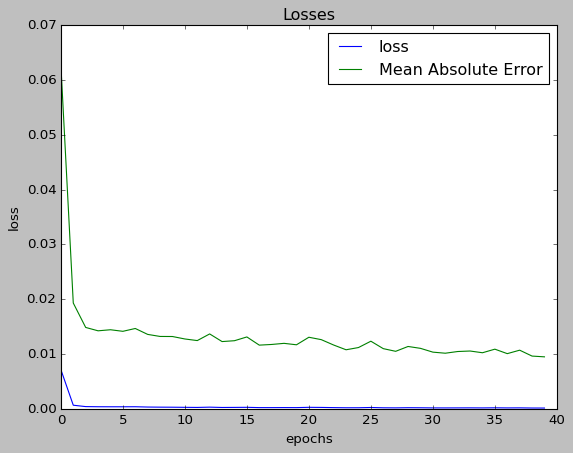

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['loss','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Prediction

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape , y_test.shape

((252, 60, 1), (252,))

In [ ]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

8/8 [==============================] - 1s 17ms/step


(252, 1)

In [ ]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

56.5

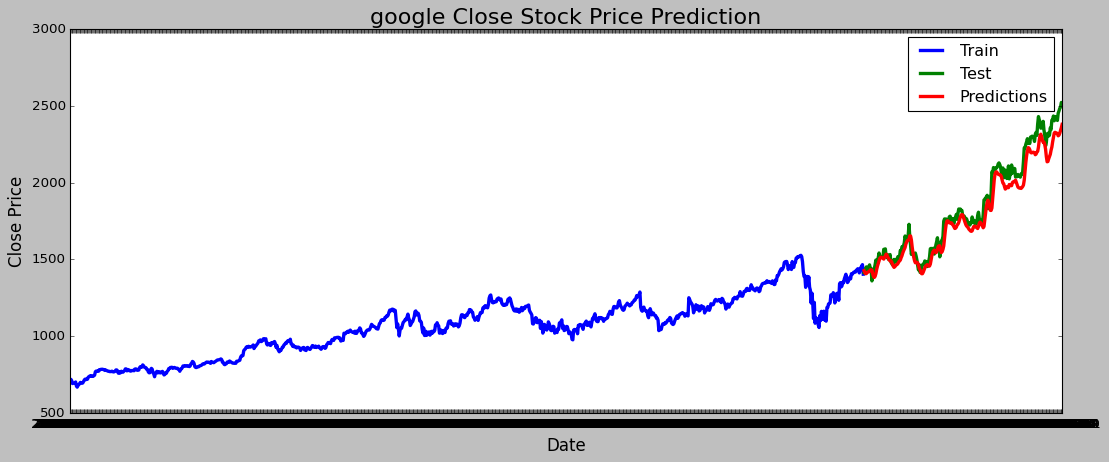

In [ ]:
train = pre.iloc[:train_size , 0:1]
test = pre.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('google Close Stock Price Prediction', fontsize= 20)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Close Price', fontsize= 15)
plt.plot(train['close'], linewidth= 3)
plt.plot(test['close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])